<a href="https://colab.research.google.com/github/Joshitha475/ML-labs/blob/main/ML_task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(data.head())

# Split the data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit classifiers to the training data
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3]:
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred_nb = nb_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)

# Generate confusion matrices
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Confusion Matrix for Naive Bayes:\n", conf_matrix_nb)
print("Confusion Matrix for Decision Tree:\n", conf_matrix_dt)

Confusion Matrix for Naive Bayes:
 [[ 0  0  1  0  0  0]
 [ 1  1  7  1  0  0]
 [ 0  1 85 41  3  0]
 [ 0  4 36 69 21  2]
 [ 0  0  2 19 21  0]
 [ 0  0  0  1  4  0]]
Confusion Matrix for Decision Tree:
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


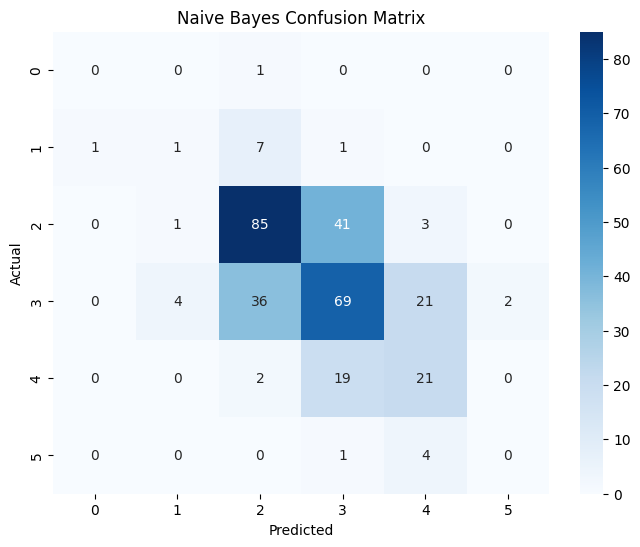

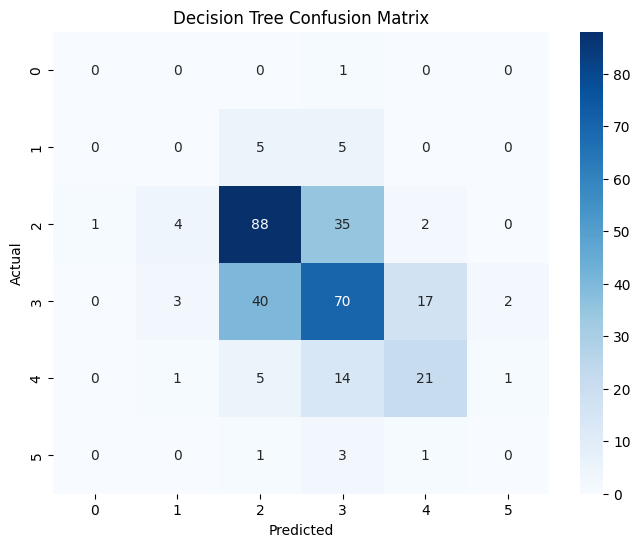

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrices(cm, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrices(conf_matrix_nb, 'Naive Bayes Confusion Matrix')
plot_confusion_matrices(conf_matrix_dt, 'Decision Tree Confusion Matrix')

In [5]:
from sklearn.metrics import classification_report

# Classification report for Naive Bayes
report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report for Naive Bayes:\n", report_nb)

# Classification report for Decision Tree
report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:\n", report_dt)

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.65      0.65      0.65       130
           6       0.53      0.52      0.52       132
           7       0.43      0.50      0.46        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.30      0.30      0.29       320
weighted avg       0.54      0.55      0.55       320

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00       